- 데이터 크로울링해서 txt로 저장하기

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time

In [3]:
"""

def crawling_blog_title(No, start_page, end_page, file_name):
    total_title_list = []
    # Chrome WebDriver 경로 설정
    webdriver_path = r'C:\Users\a\Desktop\chromedriver-win64\chromedriver.exe'

    # WebDriver 설정 및 실행
    service = Service(webdriver_path)
    driver = webdriver.Chrome(service=service)

    for i in range(start_page, end_page + 1):
        url = f'https://section.blog.naver.com/ThemePost.naver?directoryNo={No}&activeDirectorySeq=4&currentPage={i}'

        # 셀레니움으로 html 동적 크롤링
        driver.get(url)
        time.sleep(1)
        html = driver.page_source

        soup = BeautifulSoup(html, 'html.parser')
        desc = soup.find_all('div', class_='desc')

        for item in desc:
            title = item.find('strong', class_='title_post').text
            total_title_list.append(title)

    driver.quit()  # 크롬 드라이버 종료

    # 크롤링한 리스트를 파일에 저장
    with open(file_name, 'w', encoding='utf-8') as f:
        for title in total_title_list:
            f.write(title + '\n')
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 180-181: truncated \UXXXXXXXX escape (2782383985.py, line 1)

In [17]:
"""
crawling_blog_title(32, start_page=1, end_page=100, file_name='blog_medic.txt')
crawling_blog_title(34, start_page=1, end_page=100, file_name='blog_educate.txt')
"""

- 데이터 프레임화 

In [18]:
"""
import pandas as pd

base_path = r'C:\Users\a\Desktop\mini_project\13_자연어처리'
files = ['blog_medic.txt', 'blog_educate.txt', 'blog_IT.txt']
labels = [0, 1, 2]

data = []

for file, label in zip(files, labels):
    file_path = f'{base_path}\\{file}'
    
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
        for line in lines:
            data.append([line.strip(), label])

df = pd.DataFrame(data, columns=['title', 'label'])
"""

In [22]:
'''
df.head(-5)
'''

,title,label
0,자궁선근증치료 사람에 따라 다르기에,0
1,안산 피부과 투명한 피부로 관리를,0
2,배에서 꾸르륵소리 안나게하는법 꿀팁 공개,0
3,수원치아교정 고른 치열을,0
4,서울대입구역교통사고한의원 또는 한방병원 집중적인 케어를,0
...,...,...
2979,특별기획전 알리익스프레스 서울 상륙! 지하철광고,2
2980,"방송용 USB 콘덴서 마이크 조이트론 마에스트, 유튜브, 홈레코딩에 딱인데?",2
2981,모토로라 엣지 30 자급제폰으로 훌륭한 이유,2
2982,기본 갤럭시 카메라 무음 설정 소리 끄기 방법 (동영상도 OK),2


In [4]:
# df.to_csv('blog_mixed.csv', index=False, encoding='utf-8-sig')

- 모델 구현 

In [5]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter

In [6]:
df = pd.read_csv('blog_mixed.csv')

In [7]:
# 형태소 
okt = Okt()
def preprocess_text(text):
    pos_tagged = okt.pos(text)
    
    # 조사를 제외한 형태소만 선택
    filtered_words = [word for word, pos in pos_tagged if pos != 'Josa']
    
    return ' '.join(filtered_words)

df['morphemes'] = df['title'].apply(preprocess_text)

In [8]:
# 레이블 인코딩
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,title,label,morphemes,encoded_label
0,자궁선근증치료 사람에 따라 다르기에,0,자궁 선근 증 치료 사람 따라 다르기에,0
1,안산 피부과 투명한 피부로 관리를,0,안산 피부 투명한 피부 관리,0
2,배에서 꾸르륵소리 안나게하는법 꿀팁 공개,0,배 꾸르륵 소리 안 나게하는 법 꿀팁 공개,0
3,수원치아교정 고른 치열을,0,수원 치아 교정 고른 치열,0
4,서울대입구역교통사고한의원 또는 한방병원 집중적인 케어를,0,서울 대입 구역 교통사고 한의원 또는 한 방 병원 집중 적 케어,0


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\H2GTRE.ttf',  
                          background_color='white',
                          width=800,
                          height=500).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


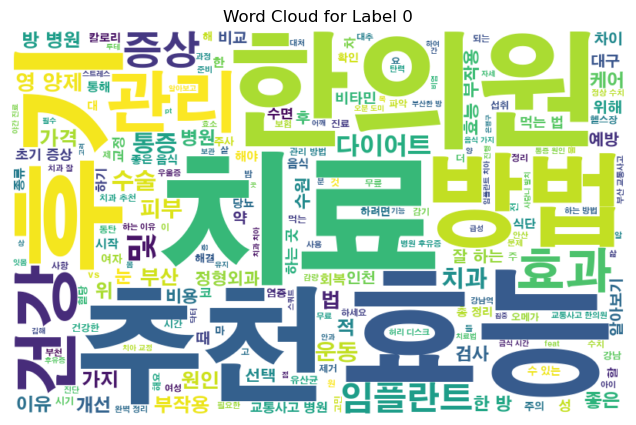

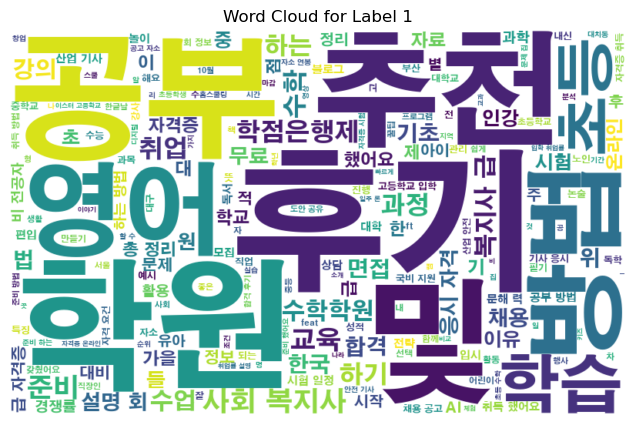

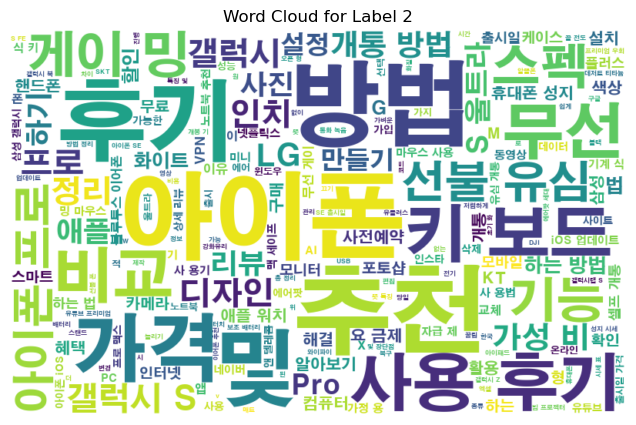

In [13]:
for label in [0, 1, 2]:
    label_text = ' '.join(df[df['encoded_label'] == label]['morphemes'])
    create_wordcloud(label_text, f'Word Cloud for Label {label}')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['morphemes'], df['encoded_label'], test_size=0.2, random_state=42)

In [15]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

In [16]:
# 단어 사전 생성
vocab = Counter()
for text in X_train:
    vocab.update(text.split())

vocab = {word: idx + 1 for idx, (word, count) in enumerate(vocab.items()) if count > 1}
vocab['<PAD>'] = 0
vocab['<UNK>'] = len(vocab)

In [17]:
# 보캡 사이즈 확인 
print(f"Vocab size: {len(vocab)}")

Vocab size: 2913


In [18]:
# 텍스트를 정수 시퀀스로
def text_to_sequence(text, vocab):
    return [vocab.get(word, vocab['<UNK>']) for word in text.split()]

In [19]:
# Dataset 
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len):
        self.texts = [text_to_sequence(text, vocab) for text in texts]
        self.labels = labels
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        try:
            text = self.texts[idx]
            label = self.labels[idx]
            
            if len(text) < self.max_len:
                text = text + [self.vocab['<PAD>']] * (self.max_len - len(text))
            else:
                text = text[:self.max_len]
            
            # 모든 인덱스가 vocab 크기 내에 있는지 확인
            text = [min(t, len(self.vocab) - 1) for t in text]
            
            return torch.tensor(text), torch.tensor(label)
        except IndexError as e:
            print(f"Error accessing index {idx}: {e}")
            return None

In [20]:
# 모델
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.fc = nn.Linear(embed_dim, num_classes)
        
    def forward(self, x):
        embedded = self.embedding(x)
        pooled = torch.mean(embedded, dim=1)
        output = self.fc(pooled)
        return output

In [21]:
MAX_LEN = 100
EMBED_DIM = 100
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.001

In [22]:
train_dataset = TextDataset(X_train, y_train, vocab, MAX_LEN)
test_dataset = TextDataset(X_test, y_test, vocab, MAX_LEN)

def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

In [23]:
model = TextClassifier(len(vocab), EMBED_DIM, len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

TextClassifier(
  (embedding): Embedding(2913, 100)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)

In [25]:
print(len(X_train), len(y_train))

2391 2391


In [26]:
for epoch in range(EPOCHS):
    model.train()
    for batch in train_loader:
        if batch is None:
            continue
        batch_texts, batch_labels = batch
        batch_texts, batch_labels = batch_texts.to(device), batch_labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_texts)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 1.1430
Epoch 2/30, Loss: 1.0796
Epoch 3/30, Loss: 1.1083
Epoch 4/30, Loss: 1.0823
Epoch 5/30, Loss: 1.0542
Epoch 6/30, Loss: 1.0633
Epoch 7/30, Loss: 1.0278
Epoch 8/30, Loss: 0.9864
Epoch 9/30, Loss: 0.9636
Epoch 10/30, Loss: 1.0011
Epoch 11/30, Loss: 0.8529
Epoch 12/30, Loss: 0.8743
Epoch 13/30, Loss: 0.8094
Epoch 14/30, Loss: 0.8252
Epoch 15/30, Loss: 0.7481
Epoch 16/30, Loss: 0.7801
Epoch 17/30, Loss: 0.6166
Epoch 18/30, Loss: 0.6786
Epoch 19/30, Loss: 0.5825
Epoch 20/30, Loss: 0.5710
Epoch 21/30, Loss: 0.4088
Epoch 22/30, Loss: 0.4964
Epoch 23/30, Loss: 0.4210
Epoch 24/30, Loss: 0.3714
Epoch 25/30, Loss: 0.3278
Epoch 26/30, Loss: 0.4572
Epoch 27/30, Loss: 0.3960
Epoch 28/30, Loss: 0.4633
Epoch 29/30, Loss: 0.3372
Epoch 30/30, Loss: 0.3429


In [27]:
model.eval()
correct = 0
total = 0

In [28]:
with torch.no_grad():
    for batch in test_loader:
        if not batch:
            continue
        batch_texts, batch_labels = batch
        batch_texts, batch_labels = batch_texts.to(device), batch_labels.to(device)
        outputs = model(batch_texts)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 89.13%


In [29]:
def classify_text(text, model, vocab, le):
    model.eval()
    morphemes = ' '.join(okt.morphs(text))
    sequence = text_to_sequence(morphemes, vocab)
    sequence = [min(t, len(vocab) - 1) for t in sequence]  # 인덱스 범위 확인
    sequence = torch.tensor([sequence]).to(device)
    
    with torch.no_grad():
        output = model(sequence)
        _, predicted = torch.max(output.data, 1)
    
    return le.inverse_transform(predicted.cpu().numpy())[0]

- 0 : 건강,의학
- 1 : 교육,학문 
- 2 : it,컴퓨터

In [30]:
new_text = "부산컴퓨터도매상가"
predicted_label = classify_text(new_text, model, vocab, le)
print(f"입력 텍스트: {new_text}")
print(f"예측된 레이블: {predicted_label}")

입력 텍스트: 부산컴퓨터도매상가
예측된 레이블: 2


- 모델 저장 

In [33]:
torch.save(model.state_dict(), 'text_classification_model.pth')
import pickle
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)